# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1510]:
# %pip install --upgrade plotly

### Import Statements

In [1511]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Notebook Presentation

In [1512]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [1513]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


In [1514]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [1515]:
print(f"The dataset shape is: {df_data.shape}, having a total of: {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

The dataset shape is: (962, 16), having a total of: 962 rows and 16 columns.


In [1516]:
print(f"The columns name of the dataset are: {df_data.columns}.")

The columns name of the dataset are: Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object').


In [1517]:
print(f"The year in which the first Nobel prize was awarded is: {df_data.year.min()}.")

The year in which the first Nobel prize was awarded is: 1901.


In [1518]:
print(f"The latest year of the Nobel prize included in the dataset is: {df_data.year.max()}.")

The latest year of the Nobel prize included in the dataset is: 2020.


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [1519]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [1520]:
#Checking for duplicates we can see there is none. 
df_data.duplicated().any()

False

In [1521]:
df_data.isna().any()

year                     False
category                 False
prize                    False
motivation                True
prize_share              False
laureate_type            False
full_name                False
birth_date                True
birth_city                True
birth_country             True
birth_country_current     True
sex                       True
organization_name         True
organization_city         True
organization_country      True
ISO                       True
dtype: bool

In [1522]:
df_data.isna().sum() # The features with more missing values are

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [1523]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

# There is no birth_date because the prize went for an institution and/or organization. It's name is added in the full_name column.

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [1524]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]
# When the organization_name is missing is because the prize went to an individual not an institution or an organization. 

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Checking for NaN values

In [1525]:
#Checking for nan values
print(f'Missing values within the dataset :\n\n{df_data.isna().value_counts()}')

Missing values within the dataset :

year   category  prize  motivation  prize_share  laureate_type  full_name  birth_date  birth_city  birth_country  birth_country_current  sex    organization_name  organization_city  organization_country  ISO  
False  False     False  False       False        False          False      False       False       False          False                  False  False              False              False                 False    698
                                                                                                                                                True               True               True                  False    153
                        True        False        False          False      False       False       False          False                  False  True               True               True                  False     68
                                                                           True        True        Tru

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [1526]:
df_data.head(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Germany,Male,Munich University,Munich,Germany,DEU
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Germany,Male,Berlin University,Berlin,Germany,DEU
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Germany,Male,NaN,NaN,NaN,DEU
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,Individual,Ronald Ross,1857-05-13,Almora,India,India,Male,University College London,Liverpool,United Kingdom,IND
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,Individual,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [1527]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])

In [1528]:
df_data["birth_date"].dtype

dtype('<M8[ns]')

#### Add a Column with the Prize Share as a Percentage

In [1529]:
separate_values_in_prize_share = df_data["prize_share"].str.split("/", expand = True)
numerator = pd.to_numeric(separate_values_in_prize_share[0])
denomenator = pd.to_numeric(separate_values_in_prize_share[1])
df_data["prize_share_percentage"] = numerator/denomenator

In [1530]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    962 non-null    int64         
 1   category                962 non-null    object        
 2   prize                   962 non-null    object        
 3   motivation              874 non-null    object        
 4   prize_share             962 non-null    object        
 5   laureate_type           962 non-null    object        
 6   full_name               962 non-null    object        
 7   birth_date              934 non-null    datetime64[ns]
 8   birth_city              931 non-null    object        
 9   birth_country           934 non-null    object        
 10  birth_country_current   934 non-null    object        
 11  sex                     934 non-null    object        
 12  organization_name       707 non-null    object    

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [1531]:
genre = df_data.sex.value_counts()
fig = px.pie(
    df_data,
    labels = genre.index,
    values = genre.values,
    names = genre.index, 
    title = "Nobel prizes by gender from 1901 until 2020",
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole = .5,
    )
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [1532]:
first_three_womens = df_data.loc[df_data.sex == "Female"].sort_values(by="year", ascending= True).head(3)
first_three_womens.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


In [1533]:
first_three_womens_names = first_three_womens[['full_name', 'category', 'birth_country']]
first_three_womens_names

,full_name,category,birth_country
18,"Marie Curie, née Sklodowska",Physics,Russian Empire (Poland)
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic)
51,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden


The prizes were for physics, peace and literature. We can see that the first 2 of them were born in the ancien Russian Epire and the Austrian Empire. 

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [1534]:
winner = df_data.duplicated(subset = ["full_name"], keep = False)
multiple_winner = df_data[winner]
print(f"The number of winners who won more then once the Nobel prize is: {multiple_winner['full_name'].nunique()}")
print(f"The winners who won more then once the Nobel prize are: \n{set(list(multiple_winner['full_name']))}.")

The number of winners who won more then once the Nobel prize is: 6
The winners who won more then once the Nobel prize are: 
{'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Marie Curie, née Sklodowska', 'John Bardeen', 'Linus Carl Pauling', 'Frederick Sanger', 'Office of the United Nations High Commissioner for Refugees (UNHCR)'}.


In [1535]:
multiple_winner.head(10)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,1.00
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,0.33
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,1.00
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,1.00
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [1536]:
print(f" There are {df_data.category.nunique()} unique categories.")

 There are 6 unique categories.


In [1537]:
prize_per_cat = df_data.category.value_counts()
fig = px.bar(
    x = prize_per_cat.index,
    y = prize_per_cat.values,
    color_continuous_scale='Aggrnyl',
    title = "Quantity of Nobel prizes by category from 1901 until 2020",
    color = prize_per_cat.values,
    pattern_shape = prize_per_cat.values,
    )

fig.update_layout(
    xaxis_title = "Nobel Prize Category",
    yaxis_title = "Number of Prizes",
    coloraxis_showscale = False,
    )
fig.show()

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [1538]:
first_economic_prize = df_data[df_data["category"] == "Economics"].sort_values(by = "year").head(2)
first_economic_prize

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50


In [1539]:
name_economy_first = list(first_economic_prize['full_name'])
print(f"The first economic prize went in the same year to: {name_economy_first}.")

The first economic prize went in the same year to: ['Jan Tinbergen', 'Ragnar Frisch'].


3 questions: 
- How many prizes went to europe?
- How many prizes went to each cathergory
- Which is the country with most Nobel prizes?

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [1540]:
#Groupby category men and women to count the number of men and women by prize category.
cat_men_women = df_data.groupby(["category", "sex"], as_index= False).agg({"prize":pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [1541]:

fig = px.bar(
    x = cat_men_women.category,
    y = cat_men_women.prize,
    color =cat_men_women.sex,
    title = "Number of Prizes Awarded per Category split by Men and Women",
    pattern_shape = cat_men_women.category,
    )

fig.update_layout(
    xaxis_title = "Nobel Prize Category",
    yaxis_title = "Number of Prizes",
    coloraxis_showscale = False,
    )
fig.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [1542]:
prizes_over_five_y = df_data.groupby(by = "year").count().prize
prizes_over_five_y

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [1543]:
prizes_over_five_y_roll = prizes_over_five_y.rolling(5).mean()
prizes_over_five_y_roll

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Name: prize, Length: 117, dtype: float64

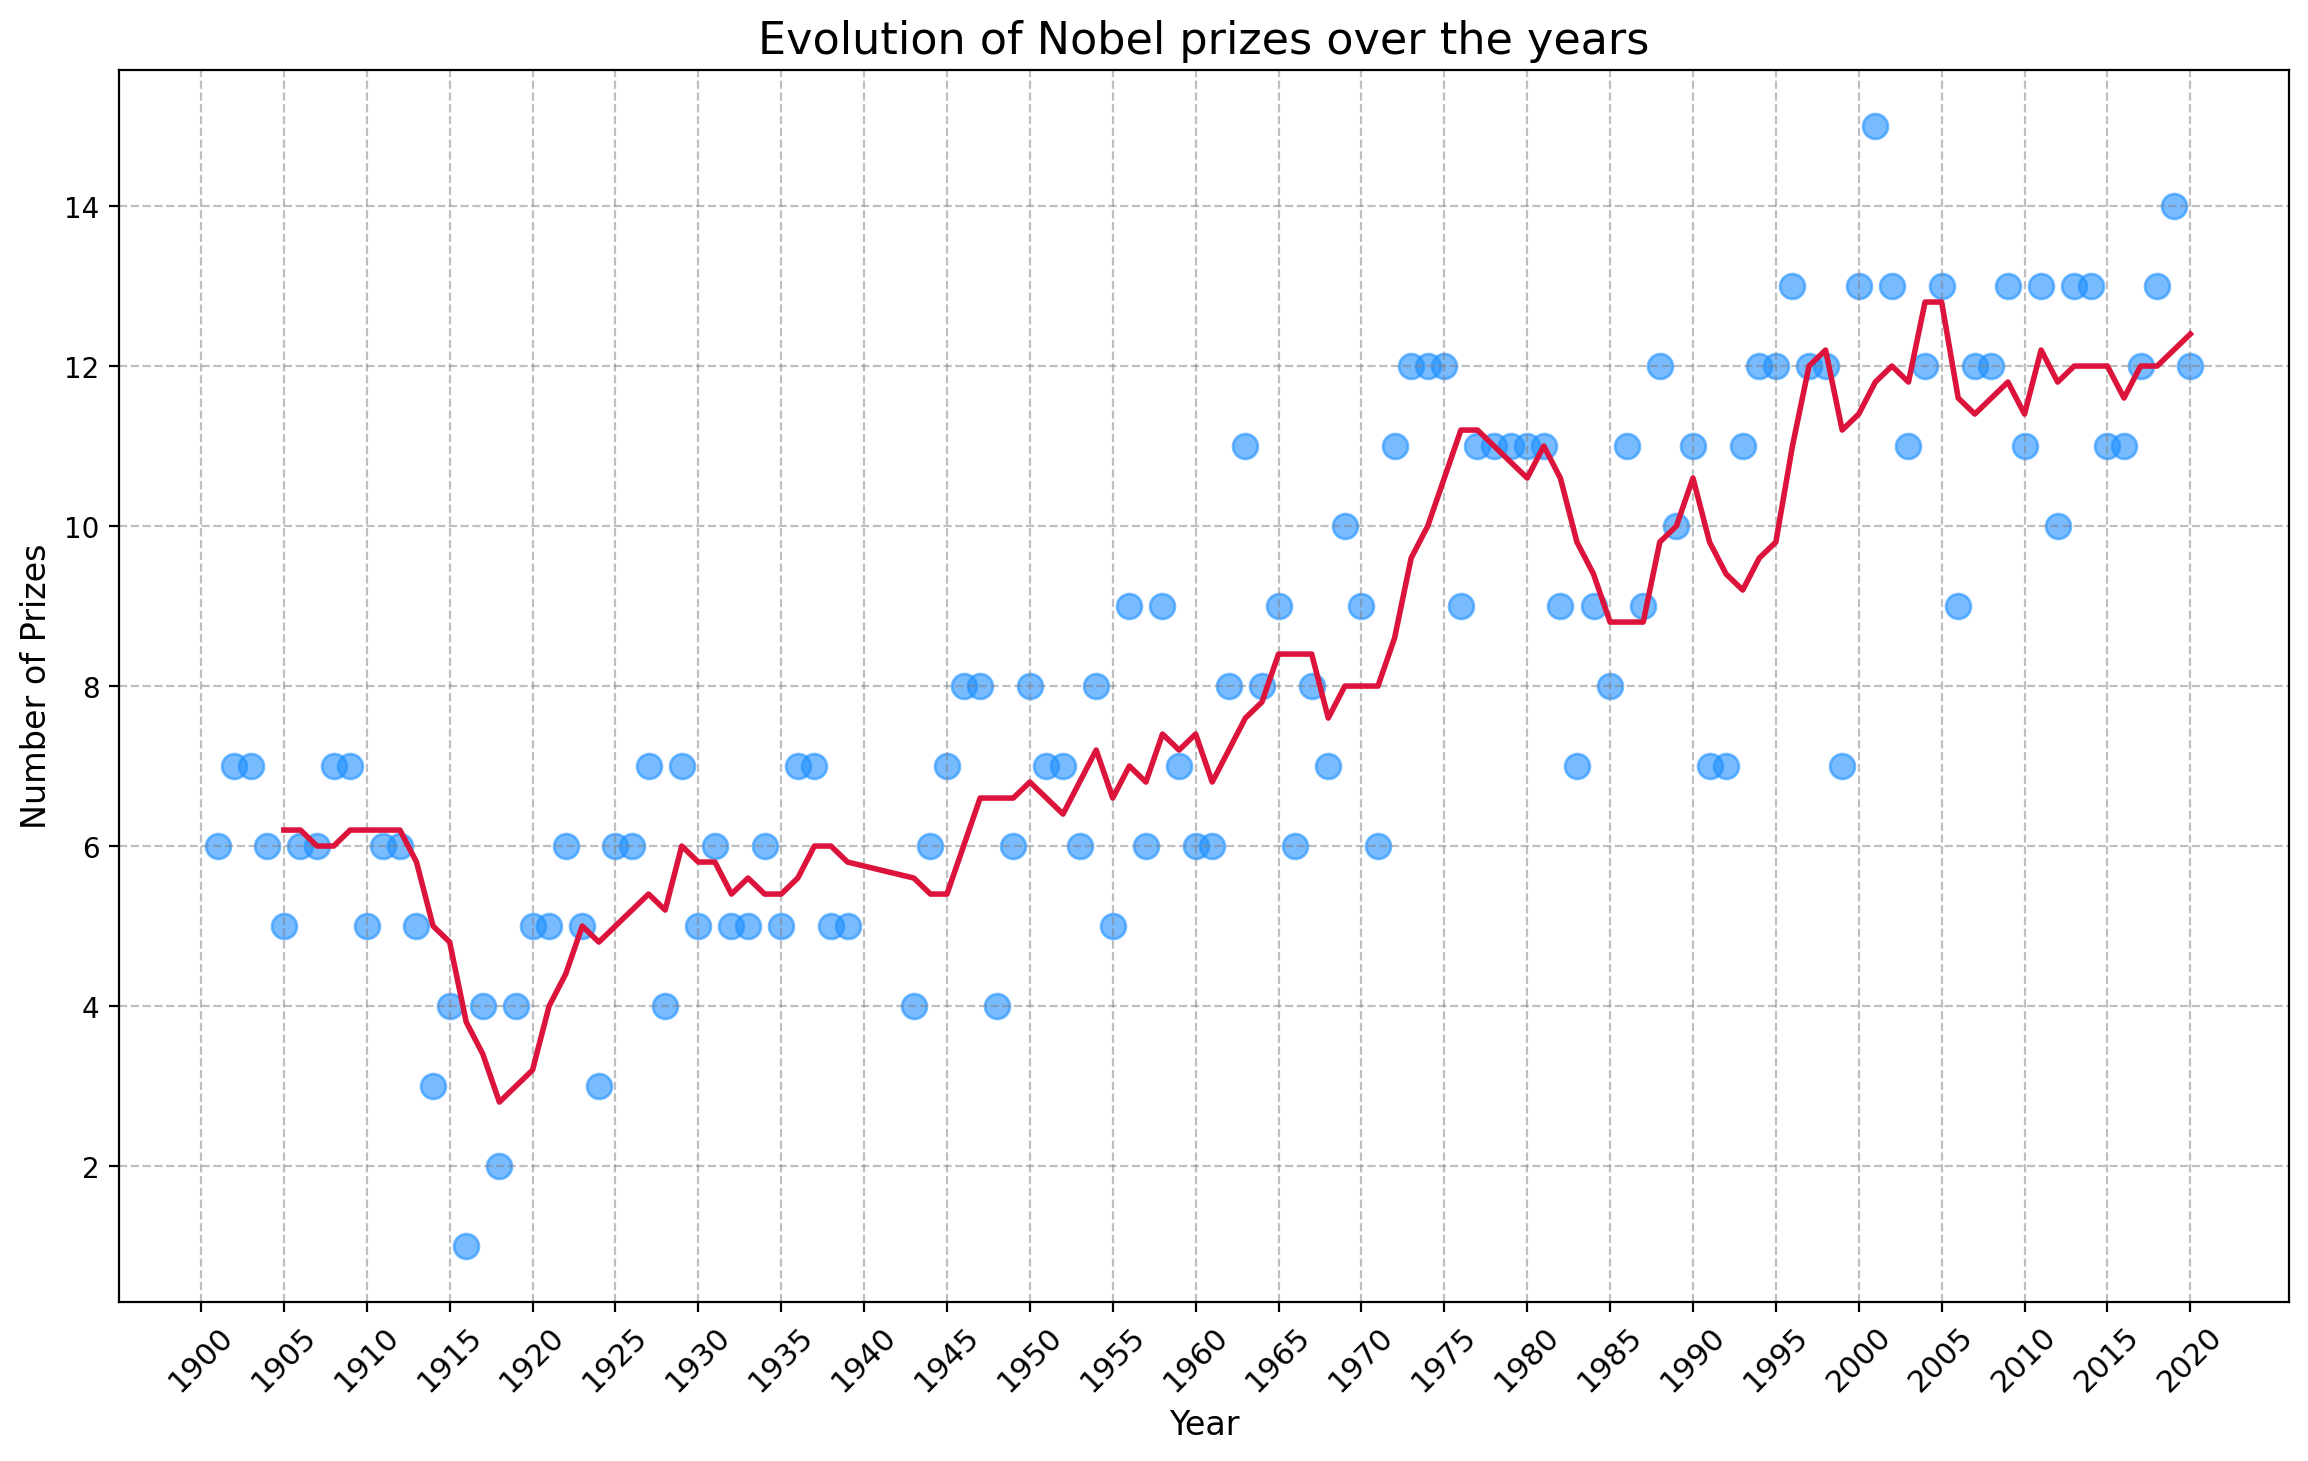

In [1544]:
plt.figure(figsize = (14, 8), dpi = 200)
plt.scatter(x = prizes_over_five_y.index,
            y = prizes_over_five_y.values,
            c = 'dodgerblue',
            alpha = 0.6,
            s = 80, 
            )

plt.plot(prizes_over_five_y.index,
         prizes_over_five_y_roll.values,
         c = "crimson",
         linewidth = 2,
         )

plt.grid(color = "grey", linestyle="--", alpha = 0.5),
plt.title("Evolution of Nobel prizes over the years", fontsize = 16)
plt.xlabel("Year", fontsize = 12),
plt.ylabel("Number of Prizes", fontsize = 12),
# plt.minorticks_on() #My option
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=11, 
           rotation=45)
plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [1545]:
df_data.head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [1546]:
yearly_avg_share = df_data.groupby(by='year').agg({'prize_share_percentage': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

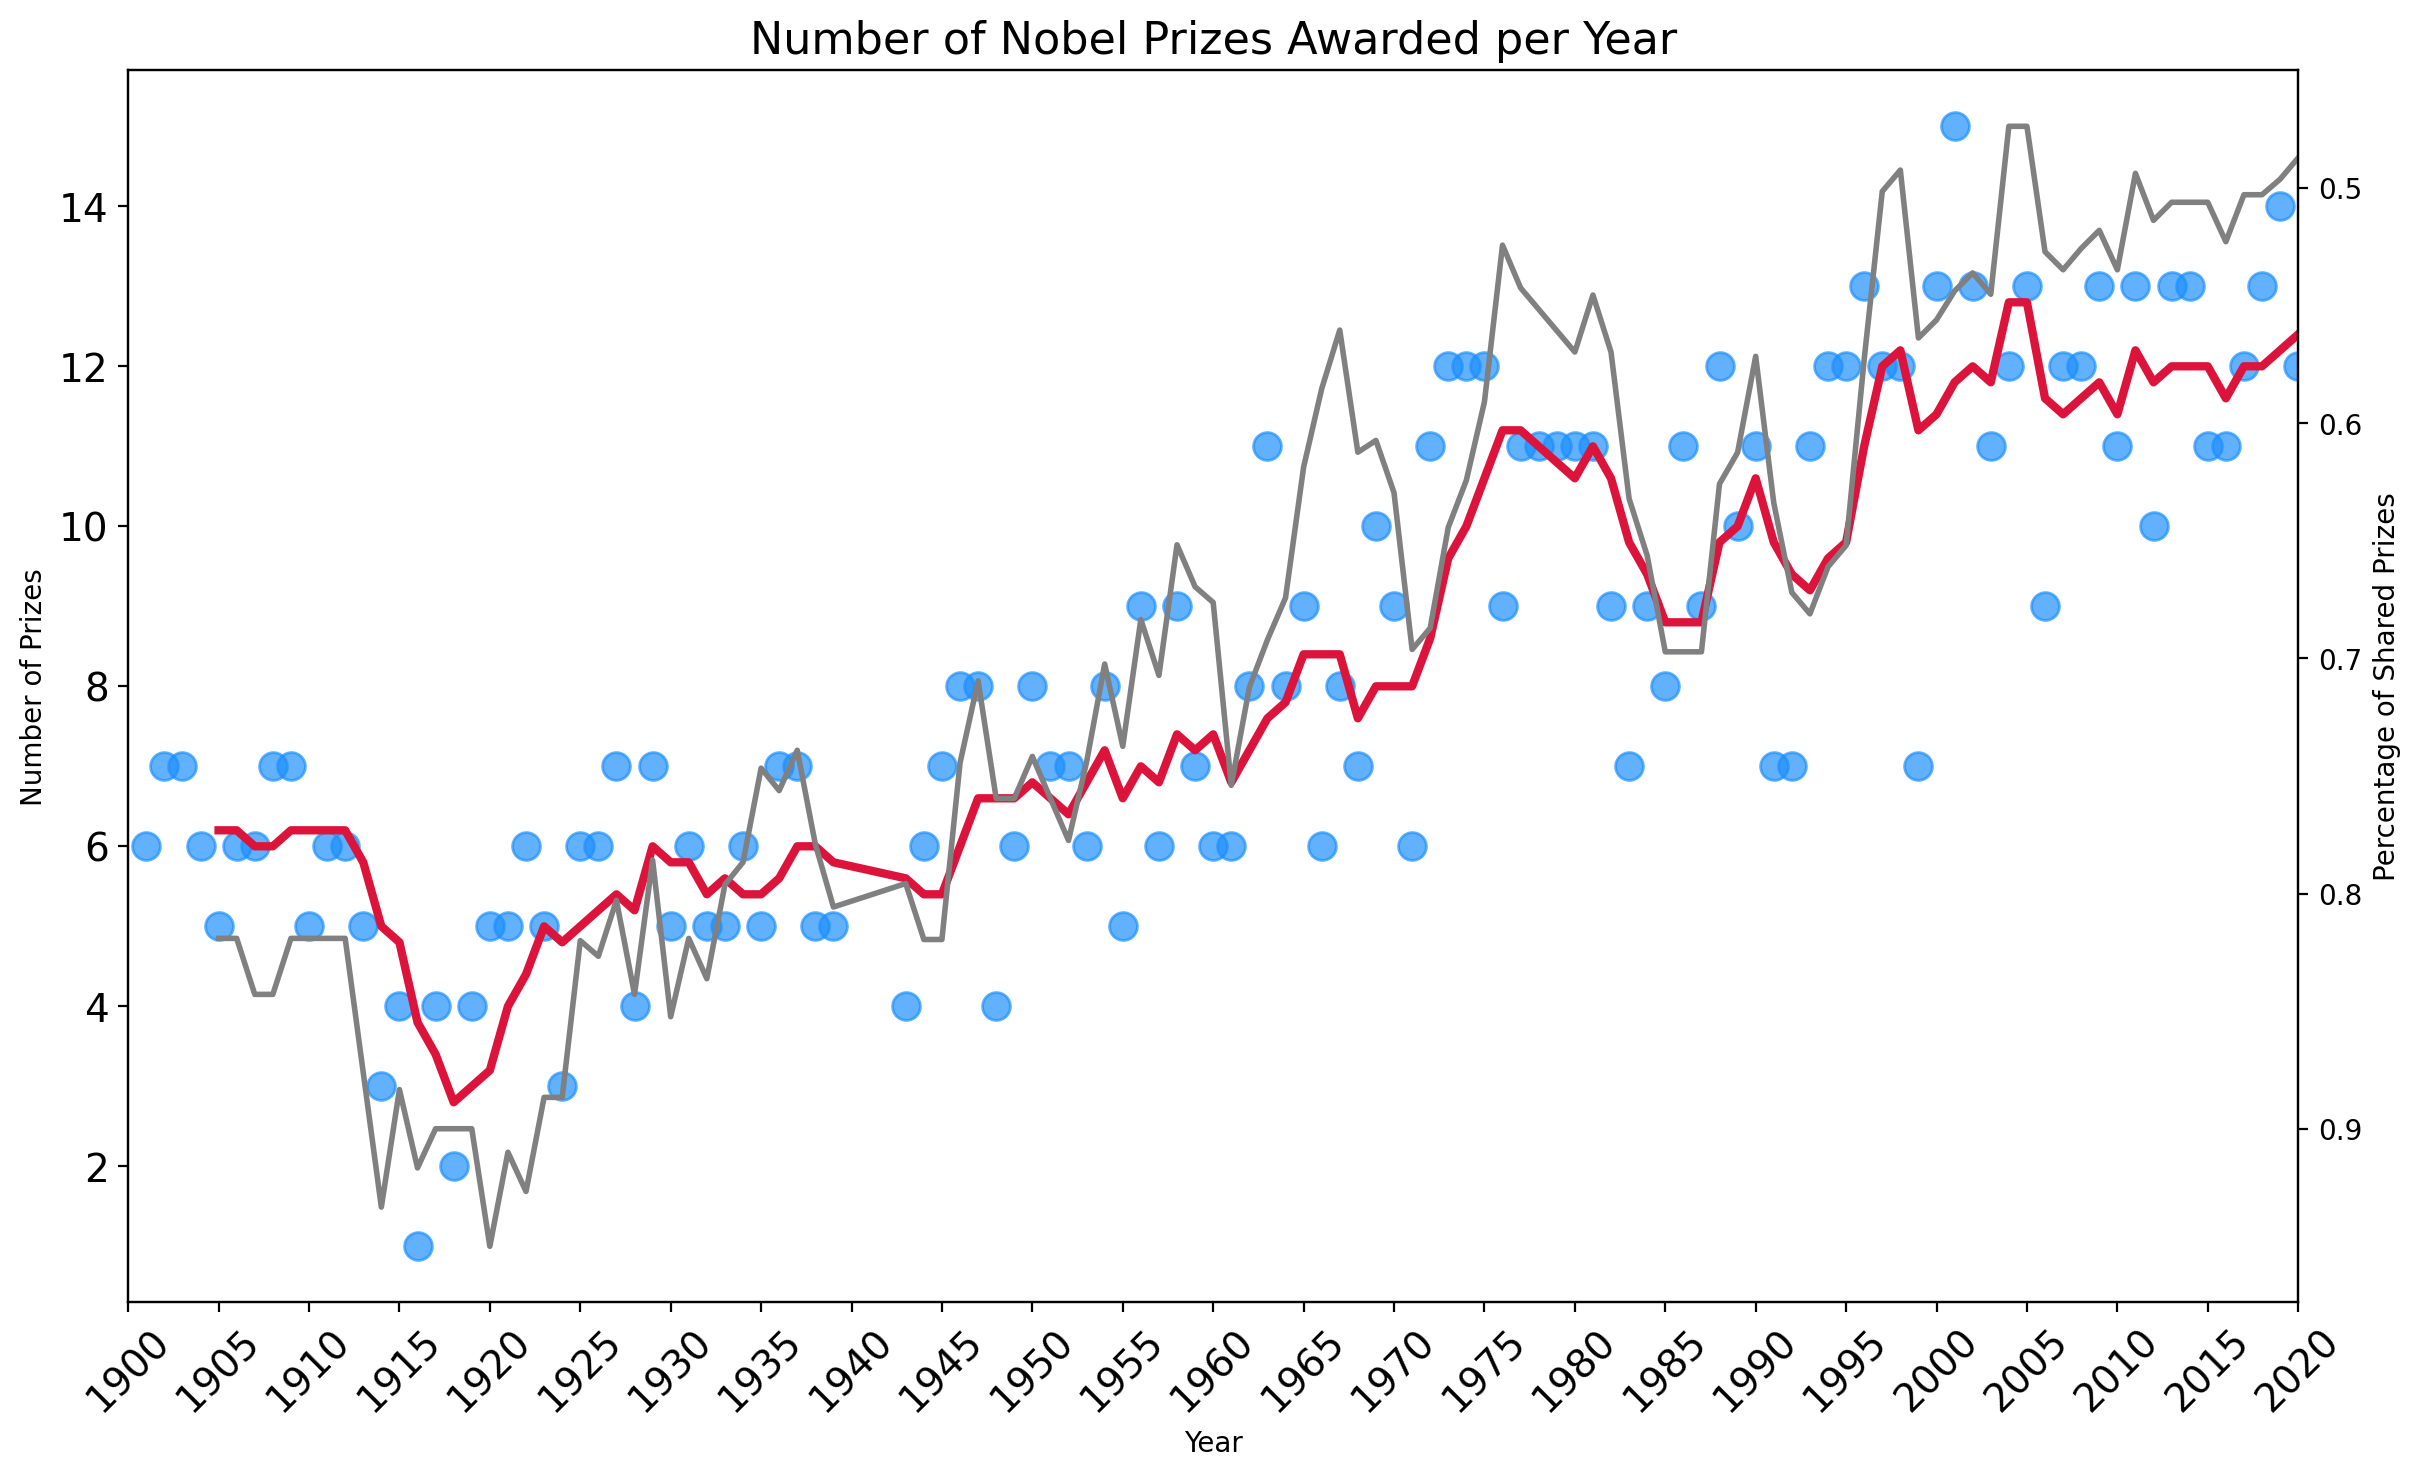

In [1547]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
               fontsize=14, 
               rotation=45)
     
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)
     
    # Can invert axis
ax2.invert_yaxis()
     
ax1.scatter(x=prizes_over_five_y.index, 
               y=prizes_over_five_y.values, 
               c='dodgerblue',
               alpha=0.7,
               s=100,)
     
ax1.plot(prizes_over_five_y.index, 
            prizes_over_five_y_roll.values, 
            c='crimson', 
            linewidth=3,)
     
ax2.plot(prizes_over_five_y.index, 
            share_moving_average.values, 
            c='grey', 
            linewidth=2,)
            
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Prizes")
ax2.set_ylabel("Percentage of Shared Prizes")
plt.show()

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [1548]:
top20_countries = df_data.groupby(by = "birth_country_current").count().prize.reset_index()
top20_countries = top20_countries.sort_values(by = "prize", ascending= False).head(20)
top20_countries.head(3)

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84


In [1549]:
country_chart = px.bar(
    top20_countries, 
    x='prize', 
    y='birth_country_current', 
    orientation='h',
    color="birth_country_current",
    )

country_chart.update_layout(
    width=1200,
    height=650,
    title_text = "Top 20 Countries by Number of Prizes", 
    title_x = 0.50, 
    xaxis_title=dict(text='Number of Prizes'),
    yaxis_title=dict(text='Country'),
    xaxis=dict(tickfont=dict(size=9)),
    yaxis=dict(tickfont=dict(size=9)),
    legend = None,
)
country_chart.update_coloraxes(colorbar_bgcolor= "rgba(240,200,0,0)")
country_chart.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [1550]:
df_countries = df_data.groupby(['birth_country_current', 'category', "ISO"], as_index=False).agg({'prize': pd.Series.count})
df_countries

,birth_country_current,category,ISO,prize
0,Algeria,Literature,DZA,1
1,Algeria,Physics,DZA,1
2,Argentina,Medicine,ARG,2
3,Argentina,Peace,ARG,2
4,Australia,Chemistry,AUS,1
...,...,...,...,...
206,United States of America,Physics,USA,70
207,Venezuela,Medicine,VEN,1
208,Vietnam,Peace,VNM,1
209,Yemen,Peace,YEM,1


In [1551]:

fig = px.choropleth(df_countries, 
                    locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter,
                    title = " Nobel Prizes distribution around the world"
                    )
fig.update_layout(
                coloraxis_showscale = True,
                width=1200,
                height=650,)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [1552]:
#Groupby birthday_country_current, and category create a new index and count the prizes for each category.
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})

#Sort values and sustitute the existing df with this one
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country.head(3)

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55


In [1553]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')

# change column names in the dataframe
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)
merged_df.head(3)

,birth_country_current,category,cat_prize,total_prize
108,India,Physics,1,9
107,India,Peace,1,9
88,South Africa,Peace,3,9


In [1554]:
country_chart = px.bar(
    merged_df, 
    x='cat_prize', 
    y='birth_country_current', 
    orientation='h',
    color="category",
    )

country_chart.update_layout(
    width=1200,
    height=800,
    title_text = "Top 20 Countries by Number of Prizes", 
    title_x = 0.50, 
    xaxis_title=dict(text='Number of Prizes'),
    yaxis_title=dict(text='Country'),
    xaxis=dict(tickfont=dict(size=9)),
    yaxis=dict(tickfont=dict(size=9)),
    legend = None,
)
country_chart.update_coloraxes(colorbar_bgcolor= "rgba(240,200,0,0)")
country_chart.show()

**In which category are Germany and Japan the weakest compared to the United States?**

Germany has less prizes then US in almost all the categories, however is curious that have no prizes for the "Peace" category comparing with the 19th ones of USA. Comparing Japan with these countries, we can observe that they don't have prizes in "Peace" category either, their only prizes are in Chemistry and Physics.

**In which category does Germany have more prizes than the UK?**

Germany has more prizes than UK in two categories: **Physics**, with 2 prizes diference and **Literature**, with 1 prize difference. 

**In which categories does France have more prizes than Germany?**

France beats Germany in two categories: **Literature**, with 3 prizes of difference and **Peace** with 5 prizes difference. 

**Which category makes up most of Australia's Nobel prizes?**

Medicine, with 7 prizes.


**Which category makes up half of the prizes in the Netherlands?**

**Physics** with 9 prizes.

**Does the United States have more prizes in Economics than all of France?**

No

**What about in Physics or Medicine?**

Yes, both in Physics(70) and Medicine(78) with 70 and 78 prizes respectively for USA a total of 53 for France.

In [1555]:
# df_data.loc[(df_data["category"] == "Physics") & (df_data["birth_country_current"] == "Japan")].count() - check if the graph is correct

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [1556]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [1557]:
#Calculate the prizes per country
year_prize_country = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
year_prize_country = year_prize_country.sort_values(by="year")[["year", "birth_country_current", "prize"]]
year_prize_country.head(3)

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1


In [1558]:
cumulative_prizes = year_prize_country.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 

In [1559]:
fig = px.line(
            cumulative_prizes,
            x="year", 
            y="prize", 
            color='birth_country_current',
            hover_name='birth_country_current'
            )
fig.update_layout(
    width=1600,
    height=600,
    title_text = "Country Nobel prizes evolution over the years", 
    title_x = 0.50, 
    xaxis_title=dict(text='Year'),
    yaxis_title=dict(text='Number of Prizes'),
)

fig.show()


# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [1560]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [1561]:
top20_organizations = df_data.groupby(by = ["organization_name"], as_index= False).agg({"prize": pd.Series.count})
top20_organizations = top20_organizations.sort_values(by="prize", ascending = False).head(20)
top20_organizations.head(3)

,organization_name,prize
196,University of California,40
68,Harvard University,29
167,Stanford University,23


In [1562]:
organization_chart = px.bar(
    top20_organizations, 
    x='prize', 
    y='organization_name', 
    orientation='h',
    color="prize",
    )

organization_chart.update_layout(
    width=1200,
    height=800,
    title_text = "Top 20 Organizations to win a Nobel prize from 1901 until 2020", 
    title_x = 0.50, 
    xaxis_title=dict(text='Number of Prizes'),
    yaxis_title=dict(text='Organization'),
)
organization_chart.update_coloraxes(colorbar_bgcolor= "rgba(240,200,0,0)")
organization_chart.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [1563]:
top20_org_cities = df_data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
top20_org_cities.head()

organization_city
Ithaca, NY         8
Los Angeles, CA    8
New Haven, CT      9
Heidelberg         9
Boston, MA         9
Name: count, dtype: int64

In [1564]:
city_bar2 = px.bar(x = top20_org_cities.values,
                      y = top20_org_cities.index,
                      orientation='h',
                      color=top20_org_cities.values,
                      color_continuous_scale=px.colors.sequential.Plasma,
                      title='The cities with most research since 1901 until 2020 are')
     
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                            width=1200,
                            height=800,
                           yaxis_title='City of the Organization',
                           coloraxis_showscale=False)
city_bar2.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [1565]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [1622]:
city_bar = px.bar(x=top20_cities.values,
                      y=top20_cities.index,
                      orientation='h',
                      color=top20_cities.values,
                      color_continuous_scale=px.colors.sequential.Plasma,
                      title='The Nobel Laureates where born in')
     
city_bar.update_layout(xaxis_title='Number of Prizes', 
                           width=1200,
                            height=800,
                           yaxis_title='City of Birth',
                           coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [1567]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [1568]:
prizes_per_organization = df_data.loc[:, ["organization_city", "organization_name", "birth_country_current", "prize", "organization_country"]].copy()
prizes_per_organization = prizes_per_organization.groupby(["organization_name", "organization_city", "organization_country"], as_index= False).agg({"prize": pd.Series.count})
prizes_per_organization.head(10)

,organization_name,organization_city,organization_country,prize
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
1,Aarhus University,Aarhus,Denmark,1
2,Academy of Sciences,Moscow,Russia,3
3,Amsterdam University,Amsterdam,Netherlands,2
4,Argonne National Laboratory,"Argonne, IL",United States of America,1
5,Arizona State University,"Tempe, AZ",United States of America,1
6,Asahi Kasei Corporation,Tokyo,Japan,1
7,Associated Universities Inc.,"Washington, DC",United States of America,1
8,Atomic Energy Research Establishment,"Harwell, Berkshire",United Kingdom,1
9,Australian National University,Canberra,Australia,1


In [1569]:
fig = px.sunburst(
    prizes_per_organization, path=['organization_country', 'organization_city', 'organization_name'], values='prize',
    title = "Discoveries over the 1901 and 2020 took place at",
)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [1575]:
df_data.head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,prize_share_percentage,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00


In [1571]:
df_data.birth_date.dtype

dtype('<M8[ns]')

In [1573]:
df_data["winning_age"] = df_data.year - df_data.birth_date.dt.year

In [1576]:
df_data.winning_age.head(3)

0   49.00
1   62.00
2   47.00
Name: winning_age, dtype: float64

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [1627]:
yongest_nobel_laureate = df_data.winning_age.min()
df_data.winning_age.idxmin()
print(f"The youngest age in the dataset is {int(df_data.winning_age.min())}, which is in the index {df_data.winning_age.idxmin()} and corespond to {df_data.full_name[885]} in the category {df_data.category[885]}. \nThe motivation of this prize is {df_data.motivation[885]}")
df_data.loc[885,:]

The youngest age in the dataset is 17, which is in the index 885 and corespond to Malala Yousafzai in the category Peace. 
The motivation of this prize is "for their struggle against the suppression of children and young people and for the right of all children to education"


year                                                                   2014
category                                                              Peace
prize                                            The Nobel Peace Prize 2014
motivation                "for their struggle against the suppression of...
prize_share                                                             1/2
laureate_type                                                    Individual
full_name                                                  Malala Yousafzai
birth_date                                              1997-07-12 00:00:00
birth_city                                                          Mingora
birth_country                                                      Pakistan
birth_country_current                                              Pakistan
sex                                                                  Female
organization_name                                                       NaN
organization

In [1626]:
oldest_nobel_laureate = df_data.winning_age.max()
df_data.winning_age.idxmax()
print(f"The oldest age in the dataset is {int(df_data.winning_age.max())}, which is in the index {df_data.winning_age.idxmax()} and corespond to {df_data.full_name[937]} in the category {df_data.category[937]}. \nThe motivation of this prize is {df_data.motivation[937]}")
df_data.loc[885,:]

The oldest age in the dataset is 97, which is in the index 937 and corespond to John Goodenough in the category Chemistry. 
The motivation of this prize is “for the development of lithium-ion batteries”


year                                                                   2014
category                                                              Peace
prize                                            The Nobel Peace Prize 2014
motivation                "for their struggle against the suppression of...
prize_share                                                             1/2
laureate_type                                                    Individual
full_name                                                  Malala Yousafzai
birth_date                                              1997-07-12 00:00:00
birth_city                                                          Mingora
birth_country                                                      Pakistan
birth_country_current                                              Pakistan
sex                                                                  Female
organization_name                                                       NaN
organization

In [1628]:
average_winner_age = df_data.winning_age.mean()
print(f"The average age of winners is {int(average_winner_age)} years old.")

The average age of winners is 59 years old.


In [1629]:
quartile75 = df_data.winning_age.quantile([0.25, 0.5, 0.75])
print(f"75% of the laureats are younger than {int(quartile75[0.75])} years old.")

75% of the laureats are younger than 69 years old.


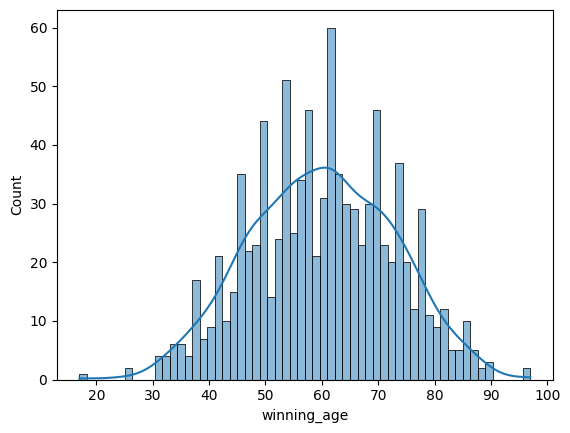

In [1621]:
sns.histplot(
    df_data.winning_age,
    bins = 60,
    kde=True,  # Kernel density to show better distribution information
    # fill=False,
    )
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [1623]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

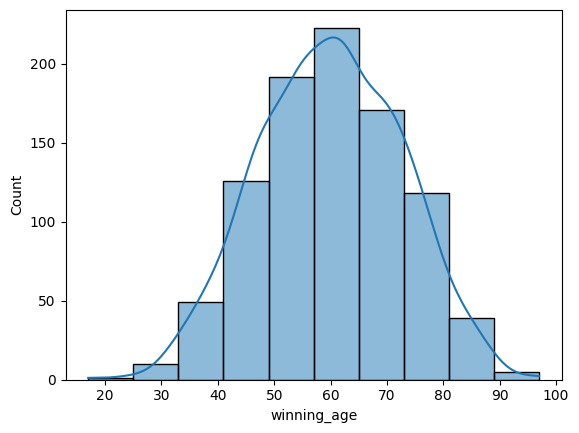

In [1632]:
sns.histplot(
    df_data.winning_age,
    bins = 10,
    kde=True,  # Kernel density to show better distribution information
    # fill=False,
    )
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


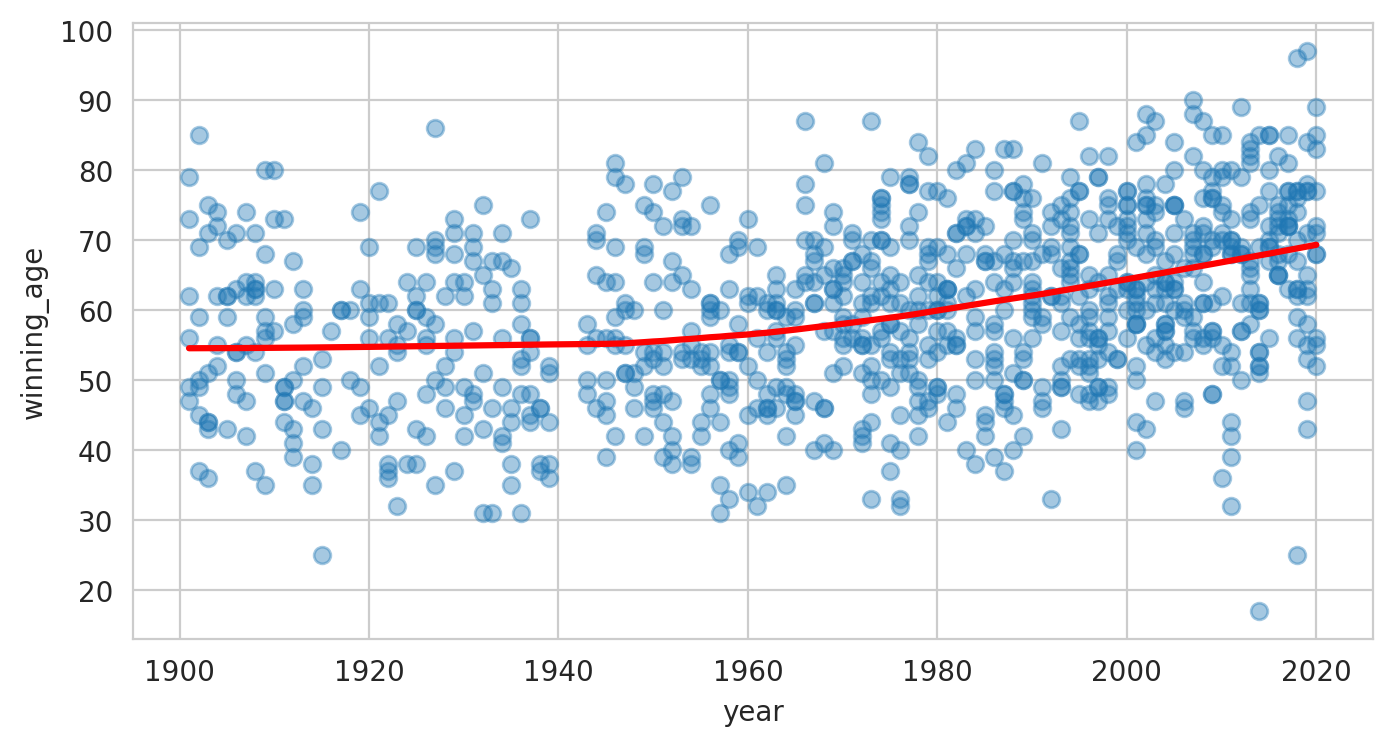

In [1634]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
            x='year',
            y='winning_age',
            lowess=True, 
            scatter_kws = {'alpha': 0.4},
            line_kws={'color': 'red'})
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

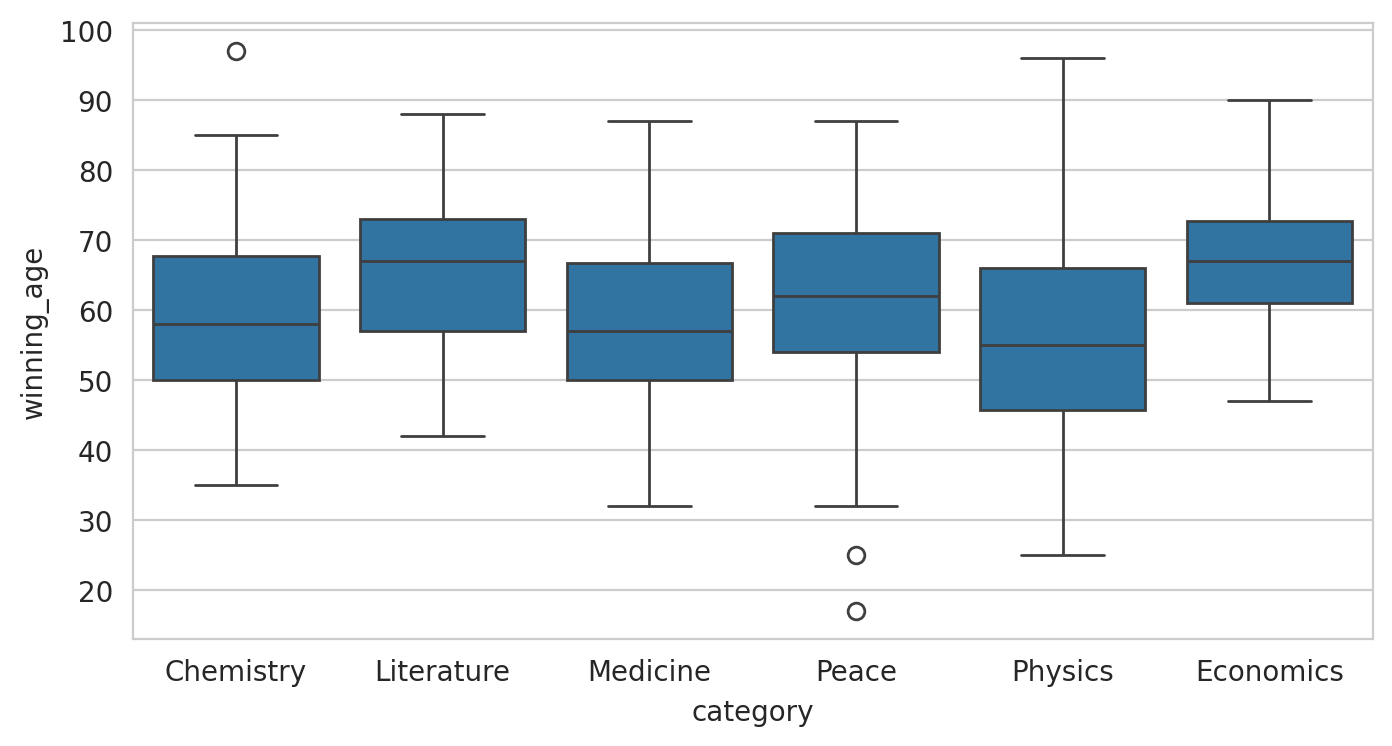

In [1639]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='winning_age',
                )
     
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


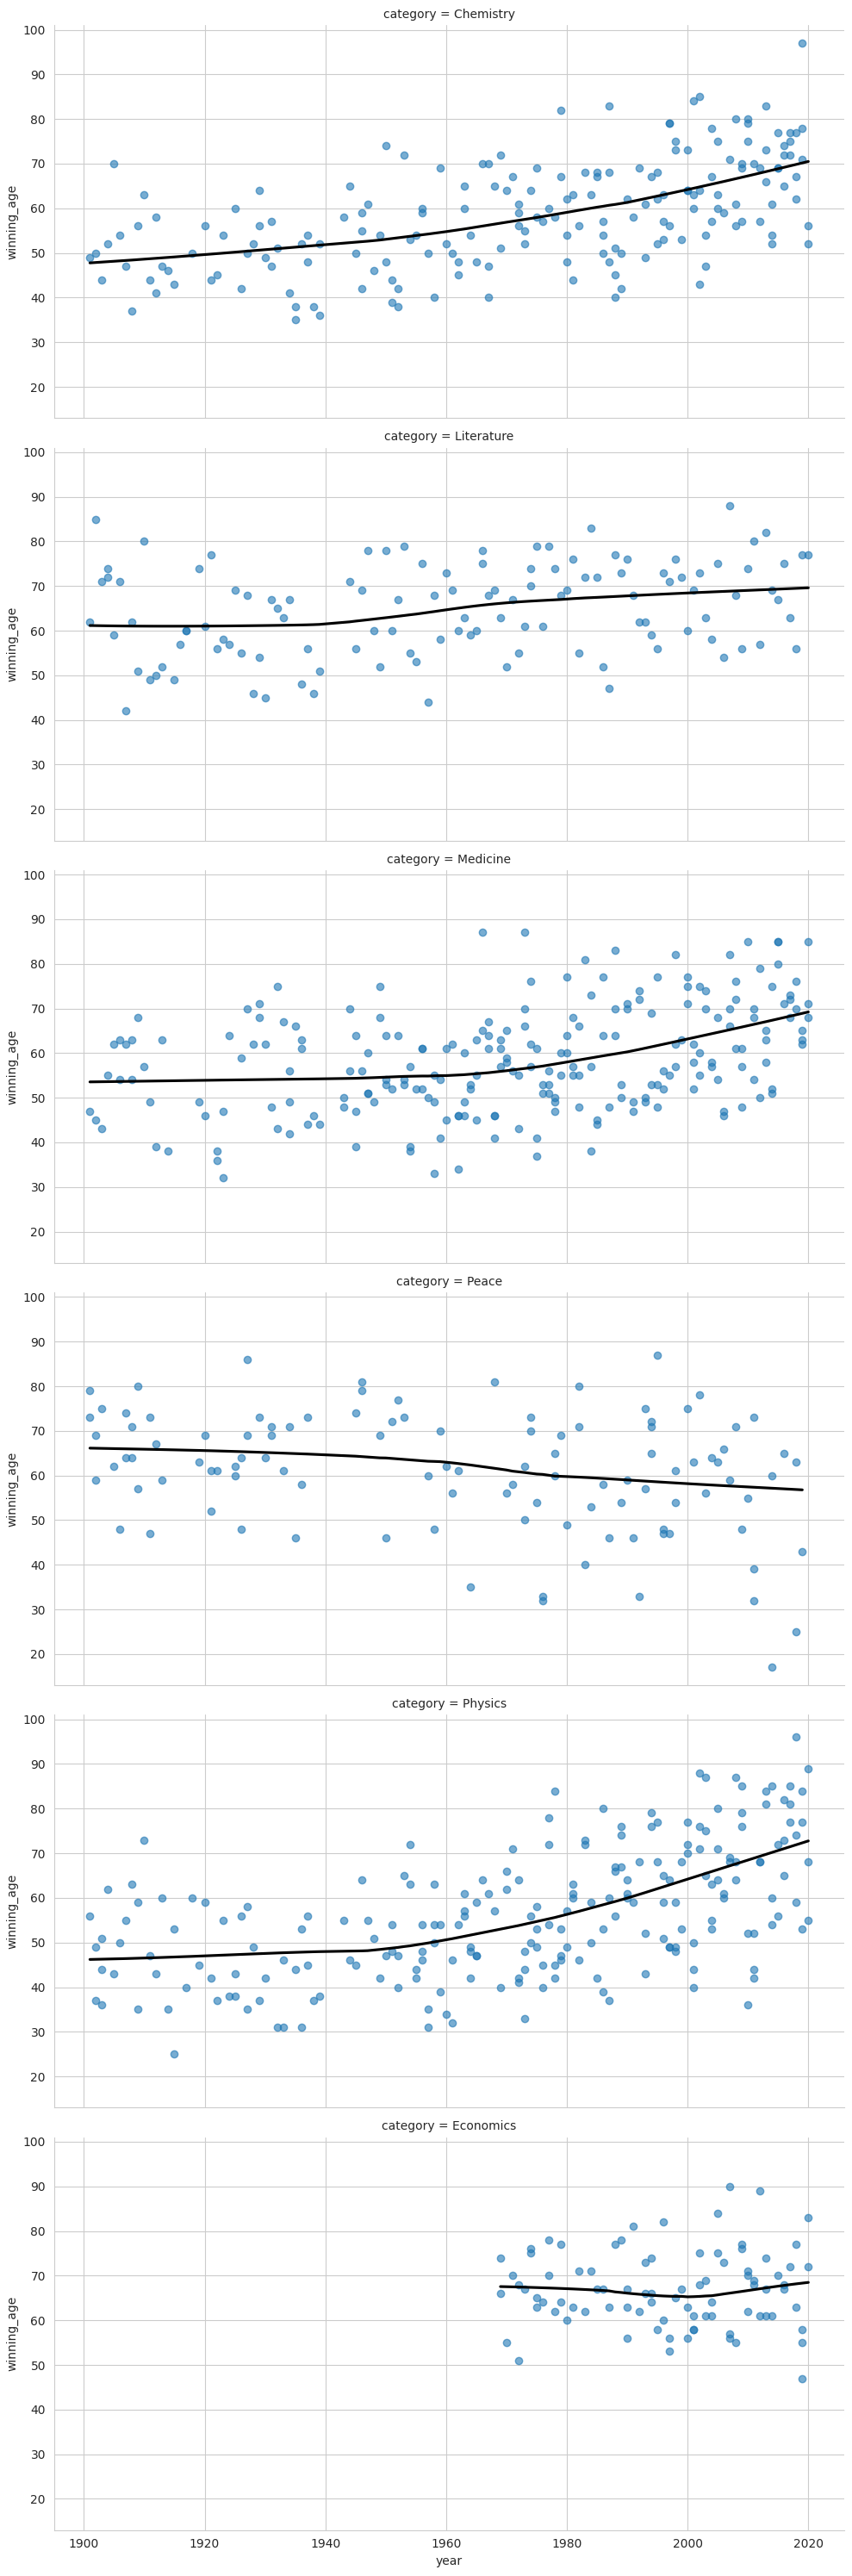

In [1640]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
                   x='year', 
                   y='winning_age',
                   row = 'category',
                   lowess=True, 
                   aspect=2,
                   scatter_kws = {'alpha': 0.6},
                   line_kws = {'color': 'black'},)
     
plt.show()

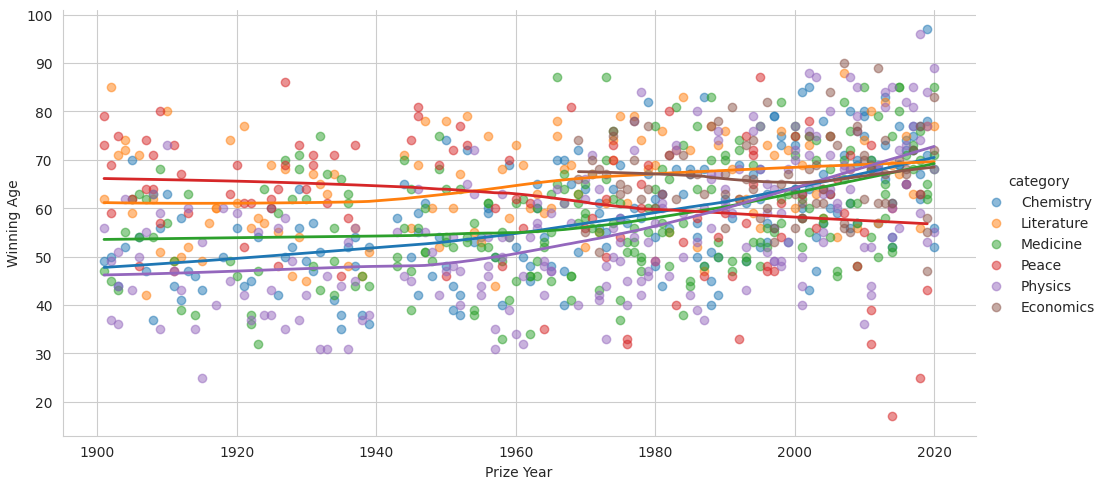

In [1662]:
with sns.axes_style('whitegrid'):
    winning_years = sns.lmplot(data=df_data,
                   x='year',
                   y = "winning_age",
                   hue = "category",
                   lowess=True, 
                   aspect=2,
                   scatter_kws = {'alpha': 0.5},
                   line_kws = {'linewidth': 2})
    winning_years.set_axis_labels("Prize Year", "Winning Age")
plt.show()